<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Time series prediction with multilayer perceptrons & LSTM



# Imports
<hr style="border:2px solid black"> </hr>

In [1]:
import matplotlib.pyplot as plt
import math, pandas, numpy, os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
import pandas as pd

rcParams['figure.figsize'] = 17, 8
rcParams['font.size'] = 20
import tensorflow as tf

In [2]:
"""
https://github.com/tensorflow/models/issues/9706
I had an issue with the numpy version
I add to donwgrade it and install
pip install numpy==1.19.5
"""

'\nhttps://github.com/tensorflow/models/issues/9706\nI had an issue with the numpy version\nI add to donwgrade it and install\npip install numpy==1.19.5\n'

In [3]:
def set_seed(seed = 31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Import dataset
<hr style="border:2px solid black"> </hr>


- You can see an upward trend in the plot. You can also see some periodicity to the dataset.
- Normally, it is a good idea to investigate various data preparation techniques to rescale the data and to make it stationary.
- **ATTENTION** We are not going to make the series stationary just to see what we can do.



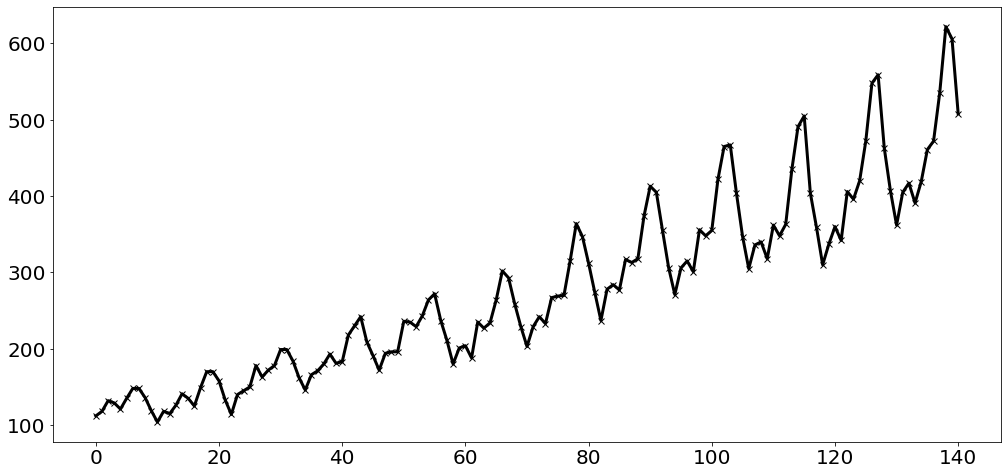

In [4]:
def getDataset():
    dataset = pandas.read_csv(
        "./airline-passengers.csv", usecols=[1], engine="python", skipfooter=3)
    dataset = dataset.values
    dataset = dataset.astype("float32")
    return dataset


dataset = getDataset()
plt.plot(dataset, "kx-", lw=3)
plt.show()

In [5]:
pd.DataFrame(dataset)

,0
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0
...,...
136,472.0
137,535.0
138,622.0
139,606.0


# Multilayer perceptron regression
<hr style="border:2px solid black"> </hr>


- We will turn the time series prediction problem into a regression problem. 
- That is, given the number of passengers (in units of thousands) this month, what is the number of passengers next month. 
- We can write a simple function to convert our single column of data into a two-column dataset. 
- The first column containing **this month’s (t)** passenger count and the second column containing **next month’s (t+1)** passenger count, to be predicted.



In [6]:
dataset = getDataset()

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

94 47


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:
testY

array([306., 315., 301., 356., 348., 355., 422., 465., 467., 404., 347.,
       305., 336., 340., 318., 362., 348., 363., 435., 491., 505., 404.,
       359., 310., 337., 360., 342., 406., 396., 420., 472., 548., 559.,
       463., 407., 362., 405., 417., 391., 419., 461., 472., 535., 622.,
       606.], dtype=float32)

In [9]:
testX

array([[271.],
       [306.],
       [315.],
       [301.],
       [356.],
       [348.],
       [355.],
       [422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.]], dtype=float32)

In [10]:
# create and fit Multilayer Perceptron model using KERAS
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= "relu"))
model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer= "adam")
model.fit(trainX, trainY, epochs = 200, batch_size=2, verbose=2)

Epoch 1/200


2023-02-02 19:34:56.717739: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


46/46 - 0s - loss: 940.0980 - 430ms/epoch - 9ms/step
Epoch 2/200
46/46 - 0s - loss: 528.3157 - 32ms/epoch - 697us/step
Epoch 3/200
46/46 - 0s - loss: 516.3281 - 31ms/epoch - 680us/step
Epoch 4/200
46/46 - 0s - loss: 512.3242 - 31ms/epoch - 675us/step
Epoch 5/200
46/46 - 0s - loss: 520.3905 - 30ms/epoch - 659us/step
Epoch 6/200
46/46 - 0s - loss: 518.9434 - 30ms/epoch - 648us/step
Epoch 7/200
46/46 - 0s - loss: 516.8735 - 30ms/epoch - 656us/step
Epoch 8/200
46/46 - 0s - loss: 521.3627 - 32ms/epoch - 688us/step
Epoch 9/200
46/46 - 0s - loss: 512.9955 - 32ms/epoch - 688us/step
Epoch 10/200
46/46 - 0s - loss: 513.1880 - 32ms/epoch - 699us/step
Epoch 11/200
46/46 - 0s - loss: 514.5288 - 31ms/epoch - 677us/step
Epoch 12/200
46/46 - 0s - loss: 528.7532 - 31ms/epoch - 683us/step
Epoch 13/200
46/46 - 0s - loss: 543.7565 - 32ms/epoch - 702us/step
Epoch 14/200
46/46 - 0s - loss: 512.6998 - 33ms/epoch - 718us/step
Epoch 15/200
46/46 - 0s - loss: 516.3380 - 31ms/epoch - 679us/step
Epoch 16/200
46/4

Epoch 124/200
46/46 - 0s - loss: 521.1707 - 45ms/epoch - 978us/step
Epoch 125/200
46/46 - 0s - loss: 515.9553 - 36ms/epoch - 774us/step
Epoch 126/200
46/46 - 0s - loss: 511.5518 - 39ms/epoch - 838us/step
Epoch 127/200
46/46 - 0s - loss: 516.6376 - 34ms/epoch - 732us/step
Epoch 128/200
46/46 - 0s - loss: 516.0084 - 32ms/epoch - 691us/step
Epoch 129/200
46/46 - 0s - loss: 514.9446 - 31ms/epoch - 680us/step
Epoch 130/200
46/46 - 0s - loss: 516.2131 - 31ms/epoch - 672us/step
Epoch 131/200
46/46 - 0s - loss: 518.3024 - 31ms/epoch - 675us/step
Epoch 132/200
46/46 - 0s - loss: 522.5692 - 31ms/epoch - 672us/step
Epoch 133/200
46/46 - 0s - loss: 517.8231 - 31ms/epoch - 675us/step
Epoch 134/200
46/46 - 0s - loss: 508.1501 - 31ms/epoch - 675us/step
Epoch 135/200
46/46 - 0s - loss: 526.8456 - 34ms/epoch - 745us/step
Epoch 136/200
46/46 - 0s - loss: 514.1941 - 36ms/epoch - 774us/step
Epoch 137/200
46/46 - 0s - loss: 513.1054 - 35ms/epoch - 758us/step
Epoch 138/200
46/46 - 0s - loss: 513.5848 - 34ms

In [11]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print("Train Score: %.2f MSE (%.2f RMSE)"  % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print("Test Score: %.2f MSE (%.2f RMSE)"  % (testScore, math.sqrt(testScore)))

Train Score: 503.89 MSE (22.45 RMSE)
Test Score: 2071.17 MSE (45.51 RMSE)


In [12]:
testX

array([[271.],
       [306.],
       [315.],
       [301.],
       [356.],
       [348.],
       [355.],
       [422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.]], dtype=float32)

In [13]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

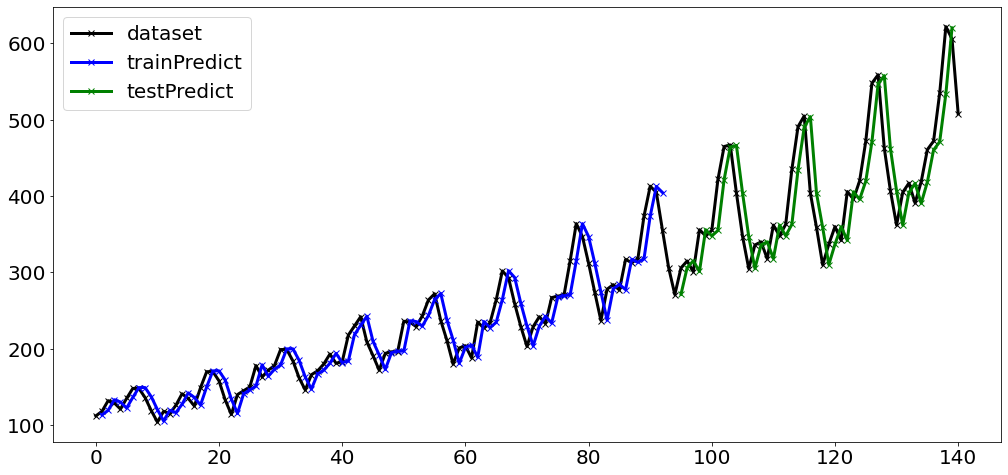

In [14]:
# plot baseline and predictions
plt.plot(dataset, "kx-", lw = 3, label = "dataset")
plt.plot(trainPredictPlot, "bx-", lw = 3, label = "trainPredict")
plt.plot(testPredictPlot, "gx-", lw = 3, label = "testPredict")
plt.legend()
plt.show()

# Multilayer perceptron using the window method
<hr style="border:2px solid black"> </hr>


- We can also phrase the problem so that multiple recent time steps can be used to make the prediction for the next time step. 
- This is called the **window method**, and the size of the window is a parameter that can be tuned for each problem. 
- For example, given the current time (t) we want to predict the value at the next time in the sequence (t+1), we can use the current time (t) as well as the two prior times (t-1 and t-2). 
- When phrased as a regression problem the input variables are t-2, t-1, t and the output variable is t+1



In [15]:
dataset = getDataset()

# convert an array of values into a dataset matrix


def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

# reshape dataset
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

94 47


In [16]:
train.shape

(94, 1)

In [17]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= "relu" ))
model.add(Dense(1))

model.compile(loss= "mean_squared_error" , optimizer= "adam")
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
42/42 - 0s - loss: 70877.9453 - 315ms/epoch - 8ms/step
Epoch 2/200
42/42 - 0s - loss: 53787.1133 - 31ms/epoch - 748us/step
Epoch 3/200
42/42 - 0s - loss: 38097.1367 - 31ms/epoch - 734us/step
Epoch 4/200
42/42 - 0s - loss: 23249.6133 - 31ms/epoch - 732us/step
Epoch 5/200
42/42 - 0s - loss: 11868.7939 - 31ms/epoch - 737us/step
Epoch 6/200
42/42 - 0s - loss: 5162.3291 - 31ms/epoch - 740us/step
Epoch 7/200
42/42 - 0s - loss: 2225.8853 - 31ms/epoch - 728us/step
Epoch 8/200
42/42 - 0s - loss: 1430.2494 - 31ms/epoch - 742us/step
Epoch 9/200
42/42 - 0s - loss: 1241.1766 - 31ms/epoch - 742us/step
Epoch 10/200
42/42 - 0s - loss: 1220.4476 - 31ms/epoch - 749us/step
Epoch 11/200
42/42 - 0s - loss: 1224.6100 - 31ms/epoch - 738us/step
Epoch 12/200
42/42 - 0s - loss: 1215.1516 - 32ms/epoch - 773us/step
Epoch 13/200
42/42 - 0s - loss: 1210.3601 - 33ms/epoch - 782us/step
Epoch 14/200
42/42 - 0s - loss: 1225.1663 - 33ms/epoch - 787us/step
Epoch 15/200
42/42 - 0s - loss: 1204.0035 - 33ms/epoc

42/42 - 0s - loss: 723.1337 - 31ms/epoch - 745us/step
Epoch 123/200
42/42 - 0s - loss: 723.6702 - 32ms/epoch - 750us/step
Epoch 124/200
42/42 - 0s - loss: 697.9849 - 31ms/epoch - 737us/step
Epoch 125/200
42/42 - 0s - loss: 714.6432 - 32ms/epoch - 752us/step
Epoch 126/200
42/42 - 0s - loss: 707.1769 - 31ms/epoch - 741us/step
Epoch 127/200
42/42 - 0s - loss: 698.4890 - 32ms/epoch - 763us/step
Epoch 128/200
42/42 - 0s - loss: 699.8130 - 33ms/epoch - 775us/step
Epoch 129/200
42/42 - 0s - loss: 686.4908 - 33ms/epoch - 786us/step
Epoch 130/200
42/42 - 0s - loss: 681.0430 - 33ms/epoch - 789us/step
Epoch 131/200
42/42 - 0s - loss: 685.7200 - 32ms/epoch - 773us/step
Epoch 132/200
42/42 - 0s - loss: 694.5425 - 32ms/epoch - 759us/step
Epoch 133/200
42/42 - 0s - loss: 687.3097 - 31ms/epoch - 743us/step
Epoch 134/200
42/42 - 0s - loss: 670.6948 - 32ms/epoch - 765us/step
Epoch 135/200
42/42 - 0s - loss: 678.6356 - 32ms/epoch - 761us/step
Epoch 136/200
42/42 - 0s - loss: 665.9401 - 32ms/epoch - 770us

In [18]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print("Train Score: %.2f MSE (%.2f RMSE)"  % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print("Test Score: %.2f MSE (%.2f RMSE)"  % (testScore, math.sqrt(testScore)))

Train Score: 384.49 MSE (19.61 RMSE)
Test Score: 1706.10 MSE (41.30 RMSE)


In [19]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

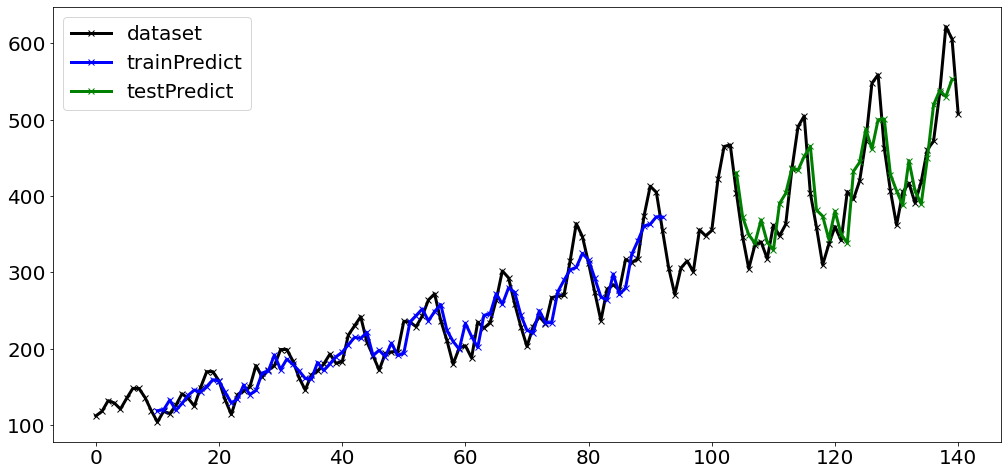

In [20]:
# plot baseline and predictions
plt.plot(dataset, "kx-", lw = 3, label = "dataset")
plt.plot(trainPredictPlot, "bx-", lw = 3, label = "trainPredict")
plt.plot(testPredictPlot, "gx-", lw = 3, label = "testPredict")
plt.legend()
plt.show()

# LSTM Network For Regression

In [21]:
dataset = getDataset()

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [22]:
train.shape

(94, 1)

In [23]:
trainX.shape

(92, 1, 1)

In [24]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim = look_back))
#model.add(LSTM(4, input_shape = (1, look_back)))

model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer= "adam" )
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 1s - loss: 0.0557 - 1s/epoch - 15ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0282 - 94ms/epoch - 1ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0215 - 93ms/epoch - 1ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0197 - 93ms/epoch - 1ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0186 - 93ms/epoch - 1ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0177 - 93ms/epoch - 1ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0167 - 93ms/epoch - 1ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0158 - 94ms/epoch - 1ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0149 - 93ms/epoch - 1ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0140 - 92ms/epoch - 1ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0131 - 93ms/epoch - 1ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0122 - 93ms/epoch - 1ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0113 - 93ms/epoch - 1ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0104 - 93ms/epoch - 1ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0097 - 93ms/epoch - 1ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0087 - 94ms/epoch - 1ms/step
Ep

In [25]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [26]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE"  % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Test Score: %.2f RMSE"  % (testScore))

Train Score: 22.31 RMSE
Test Score: 49.64 RMSE


In [27]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

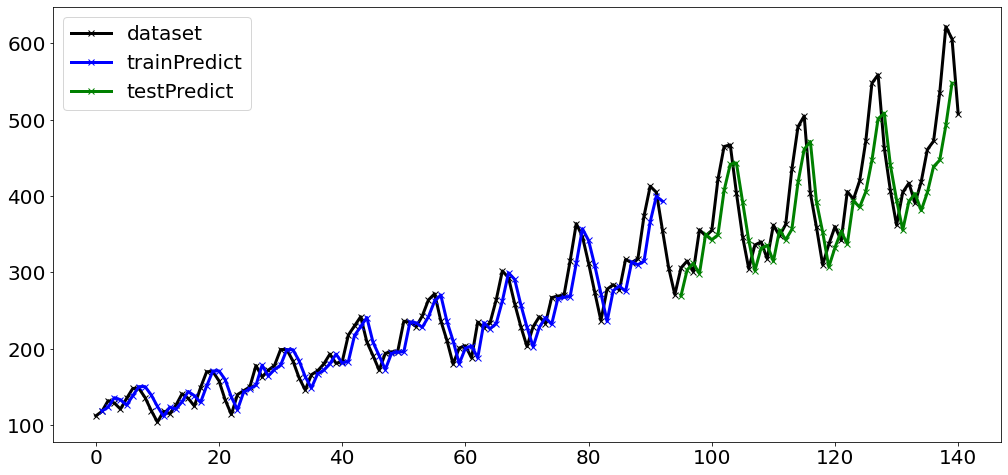

In [28]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), "kx-", lw = 3, label = "dataset")
plt.plot(trainPredictPlot, "bx-", lw = 3, label = "trainPredict")
plt.plot(testPredictPlot, "gx-", lw = 3, label = "testPredict")
plt.legend()
plt.show()

## How do you make prediction into the future?


- So far we have compared our predictions against the test set.
- What if we want to predict into the future?
- This what we are going to do now. **I still have to do!**



In [29]:
testX.shape

(45, 1, 1)

In [30]:
testPredict = model.predict(testX)

# LSTM For Regression Using the Window Method

In [31]:
dataset = getDataset()

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size

train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [32]:
trainX.shape

(90, 1, 3)

In [33]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer= "adam" )
model.fit(trainX, trainY, epochs = 100, batch_size=1, verbose=2)

Epoch 1/100
90/90 - 1s - loss: 0.0362 - 1s/epoch - 16ms/step
Epoch 2/100
90/90 - 0s - loss: 0.0134 - 93ms/epoch - 1ms/step
Epoch 3/100
90/90 - 0s - loss: 0.0101 - 94ms/epoch - 1ms/step
Epoch 4/100
90/90 - 0s - loss: 0.0087 - 96ms/epoch - 1ms/step
Epoch 5/100
90/90 - 0s - loss: 0.0072 - 94ms/epoch - 1ms/step
Epoch 6/100
90/90 - 0s - loss: 0.0060 - 93ms/epoch - 1ms/step
Epoch 7/100
90/90 - 0s - loss: 0.0051 - 91ms/epoch - 1ms/step
Epoch 8/100
90/90 - 0s - loss: 0.0044 - 93ms/epoch - 1ms/step
Epoch 9/100
90/90 - 0s - loss: 0.0038 - 94ms/epoch - 1ms/step
Epoch 10/100
90/90 - 0s - loss: 0.0034 - 97ms/epoch - 1ms/step
Epoch 11/100
90/90 - 0s - loss: 0.0032 - 95ms/epoch - 1ms/step
Epoch 12/100
90/90 - 0s - loss: 0.0030 - 96ms/epoch - 1ms/step
Epoch 13/100
90/90 - 0s - loss: 0.0029 - 95ms/epoch - 1ms/step
Epoch 14/100
90/90 - 0s - loss: 0.0029 - 94ms/epoch - 1ms/step
Epoch 15/100
90/90 - 0s - loss: 0.0028 - 91ms/epoch - 1ms/step
Epoch 16/100
90/90 - 0s - loss: 0.0027 - 92ms/epoch - 1ms/step
Ep

In [34]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE"  % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Test Score: %.2f RMSE"  % (testScore))

Train Score: 22.60 RMSE
Test Score: 48.88 RMSE


In [35]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

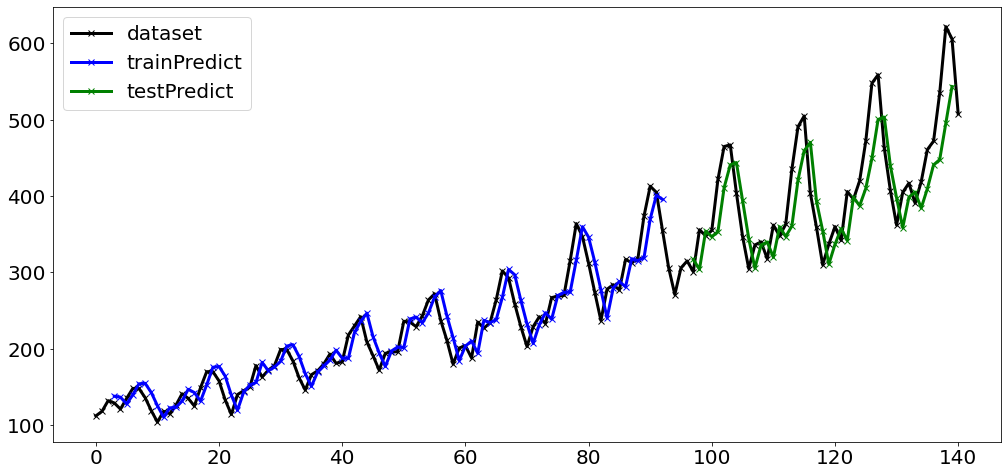

In [36]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), "kx-", lw = 3, label = "dataset")
plt.plot(trainPredictPlot, "bx-", lw = 3, label = "trainPredict")
plt.plot(testPredictPlot, "gx-", lw = 3, label = "testPredict")
plt.legend()
plt.show()

# LSTM For Regression with Time Steps

In [37]:
dataset = getDataset()
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [38]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=1))
model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer= "adam" )
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
90/90 - 1s - loss: 0.0228 - 1s/epoch - 16ms/step
Epoch 2/100
90/90 - 0s - loss: 0.0092 - 120ms/epoch - 1ms/step
Epoch 3/100
90/90 - 0s - loss: 0.0077 - 119ms/epoch - 1ms/step
Epoch 4/100
90/90 - 0s - loss: 0.0068 - 114ms/epoch - 1ms/step
Epoch 5/100
90/90 - 0s - loss: 0.0058 - 114ms/epoch - 1ms/step
Epoch 6/100
90/90 - 0s - loss: 0.0051 - 113ms/epoch - 1ms/step
Epoch 7/100
90/90 - 0s - loss: 0.0046 - 118ms/epoch - 1ms/step
Epoch 8/100
90/90 - 0s - loss: 0.0042 - 122ms/epoch - 1ms/step
Epoch 9/100
90/90 - 0s - loss: 0.0038 - 122ms/epoch - 1ms/step
Epoch 10/100
90/90 - 0s - loss: 0.0037 - 116ms/epoch - 1ms/step
Epoch 11/100
90/90 - 0s - loss: 0.0036 - 114ms/epoch - 1ms/step
Epoch 12/100
90/90 - 0s - loss: 0.0035 - 114ms/epoch - 1ms/step
Epoch 13/100
90/90 - 0s - loss: 0.0034 - 114ms/epoch - 1ms/step
Epoch 14/100
90/90 - 0s - loss: 0.0035 - 115ms/epoch - 1ms/step
Epoch 15/100
90/90 - 0s - loss: 0.0034 - 120ms/epoch - 1ms/step
Epoch 16/100
90/90 - 0s - loss: 0.0034 - 120ms/epoc

In [39]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [40]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE"  % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Test Score: %.2f RMSE"  % (testScore))

Train Score: 24.35 RMSE
Test Score: 50.59 RMSE


In [41]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

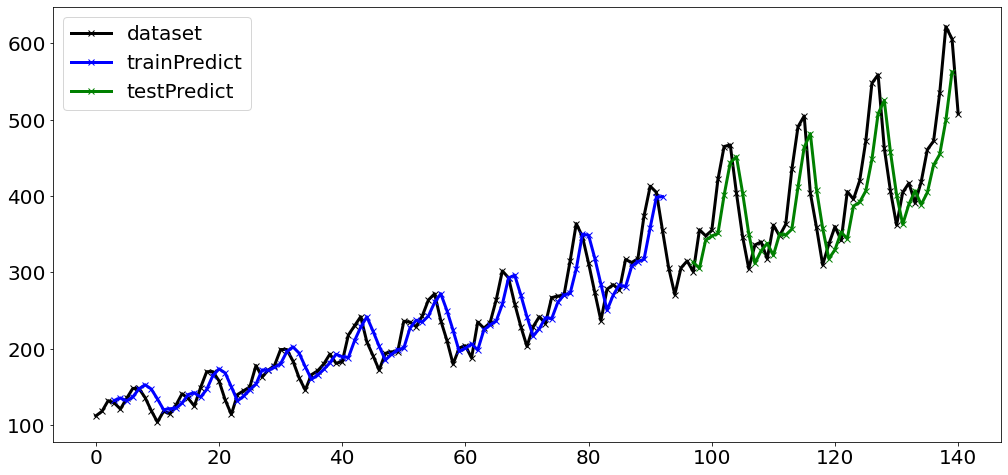

In [42]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), "kx-", lw = 3, label = "dataset")
plt.plot(trainPredictPlot, "bx-", lw = 3, label = "trainPredict")
plt.plot(testPredictPlot, "gx-", lw = 3, label = "testPredict")
plt.legend()
plt.show()

# LSTM With Memory Between Batches


- The LSTM network has memory which is capable of remembering across long sequences.
- We can gain finer control over when the internal state of the LSTM network is cleared in Keras by making the LSTM layer stateful. 
- This means that it can build state over the entire training sequence and even maintain that state if needed to make predictions.



In [43]:
dataset = getDataset()

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [44]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss = "mean_squared_error" , optimizer = "adam")
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

90/90 - 1s - loss: 0.0045 - 1s/epoch - 17ms/step
90/90 - 0s - loss: 0.0132 - 117ms/epoch - 1ms/step
90/90 - 0s - loss: 0.0091 - 124ms/epoch - 1ms/step
90/90 - 0s - loss: 0.0067 - 123ms/epoch - 1ms/step
90/90 - 0s - loss: 0.0054 - 122ms/epoch - 1ms/step
90/90 - 0s - loss: 0.0048 - 122ms/epoch - 1ms/step
90/90 - 0s - loss: 0.0047 - 117ms/epoch - 1ms/step
90/90 - 0s - loss: 0.0046 - 118ms/epoch - 1ms/step
90/90 - 0s - loss: 0.0046 - 117ms/epoch - 1ms/step
90/90 - 0s - loss: 0.0046 - 123ms/epoch - 1ms/step
90/90 - 0s - loss: 0.0046 - 123ms/epoch - 1ms/step
90/90 - 0s - loss: 0.0045 - 117ms/epoch - 1ms/step
90/90 - 0s - loss: 0.0045 - 117ms/epoch - 1ms/step
90/90 - 0s - loss: 0.0045 - 116ms/epoch - 1ms/step
90/90 - 0s - loss: 0.0044 - 125ms/epoch - 1ms/step
90/90 - 0s - loss: 0.0044 - 123ms/epoch - 1ms/step
90/90 - 0s - loss: 0.0044 - 122ms/epoch - 1ms/step
90/90 - 0s - loss: 0.0044 - 118ms/epoch - 1ms/step
90/90 - 0s - loss: 0.0043 - 120ms/epoch - 1ms/step
90/90 - 0s - loss: 0.0043 - 123ms

In [45]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [46]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE"  % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Test Score: %.2f RMSE"  % (testScore))

Train Score: 25.88 RMSE
Test Score: 52.42 RMSE


In [47]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
                                                                                            

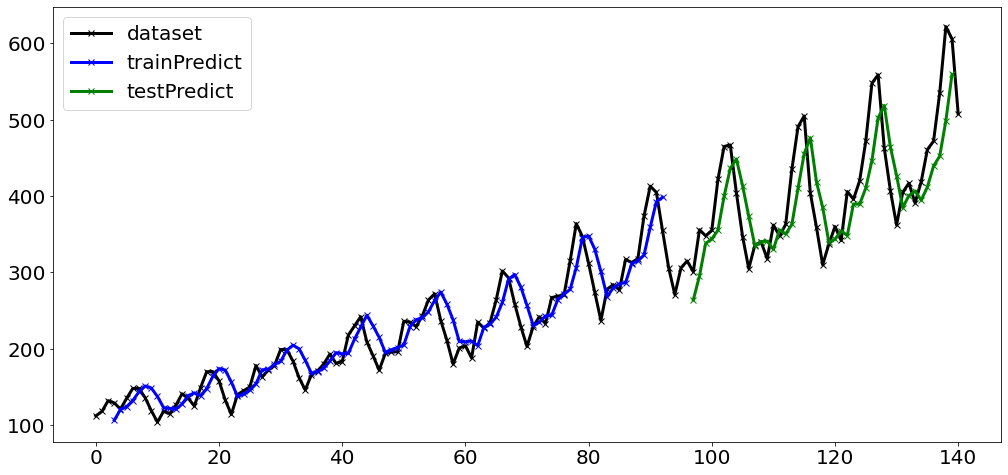

In [48]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), "kx-", lw = 3, label = "dataset")
plt.plot(trainPredictPlot, "bx-", lw = 3, label = "trainPredict")
plt.plot(testPredictPlot, "gx-", lw = 3, label = "testPredict")
plt.legend()
plt.show()


- We do see that results are worse. 
- The model may need more modules and may need to be trained for more epochs to internalize the structure of thee problem.
- We'll try this in the next section. 



# Stacked LSTMs With Memory Between Batches


- Finally, we will take a look at one of the big benefits of LSTMs, the fact that they can be successfully trained when stacked into deep network architectures



In [49]:
dataset = getDataset()

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [50]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True,
    return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer= "adam")
for i in range(100):
    model.fit(trainX, trainY, epochs =1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

90/90 - 3s - loss: 0.0049 - 3s/epoch - 31ms/step
90/90 - 0s - loss: 0.0105 - 184ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0075 - 186ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0062 - 186ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0058 - 186ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0057 - 185ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0057 - 185ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0057 - 185ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0057 - 184ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0057 - 186ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0057 - 186ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0057 - 185ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0057 - 187ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0057 - 186ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0057 - 185ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0056 - 185ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0056 - 186ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0056 - 185ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0056 - 186ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0056 - 185ms

In [51]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [52]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE"  % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Test Score: %.2f RMSE"  % (testScore))

Train Score: 21.18 RMSE
Test Score: 61.14 RMSE


In [53]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

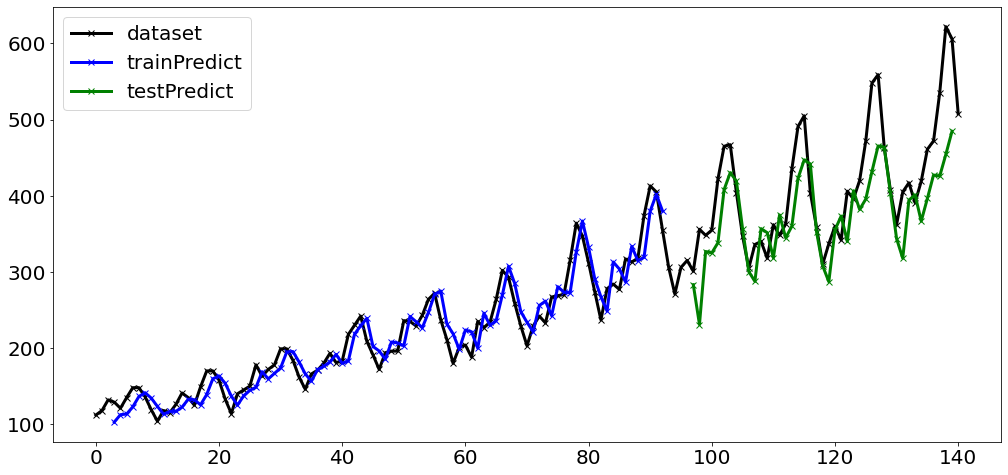

In [54]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), "kx-", lw = 3, label = "dataset")
plt.plot(trainPredictPlot, "bx-", lw = 3, label = "trainPredict")
plt.plot(testPredictPlot, "gx-", lw = 3, label = "testPredict")
plt.legend()
plt.show()


- The predictions on the test dataset are again worse. 
- This is more evidence to suggest the need for additional training epochs.  



# Let us train for more epoches

In [55]:
dataset = getDataset()

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [56]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True,
    return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer= "adam")

for i in range(300):
    model.fit(trainX, trainY, epochs =1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

90/90 - 3s - loss: 0.0045 - 3s/epoch - 29ms/step
90/90 - 0s - loss: 0.0075 - 187ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0061 - 188ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0055 - 187ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0052 - 186ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0051 - 186ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0051 - 196ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0051 - 203ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0050 - 188ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0050 - 186ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0050 - 188ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0050 - 186ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0049 - 187ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0049 - 187ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0049 - 189ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0048 - 196ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0048 - 196ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0048 - 192ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0047 - 188ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0047 - 188ms

90/90 - 0s - loss: 0.0015 - 187ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 197ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 190ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 187ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 188ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 198ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 188ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 186ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 196ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 198ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 186ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 188ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 194ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 187ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 196ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 200ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 199ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 208ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 188ms/epoch - 2ms/step
90/90 - 0s - loss: 0.0015 - 188

In [57]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [58]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE"  % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Test Score: %.2f RMSE"  % (testScore))

Train Score: 16.09 RMSE
Test Score: 60.91 RMSE


In [59]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

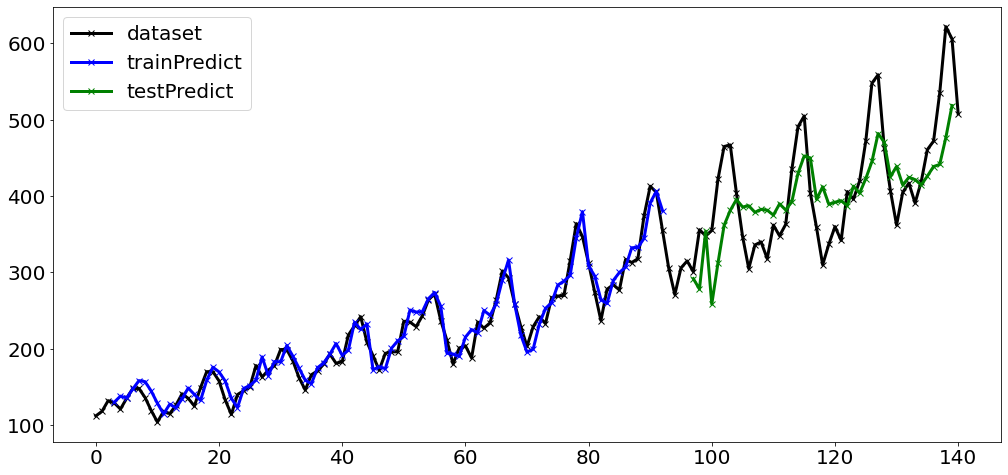

In [60]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), "kx-", lw = 3, label = "dataset")
plt.plot(trainPredictPlot, "bx-", lw = 3, label = "trainPredict")
plt.plot(testPredictPlot, "gx-", lw = 3, label = "testPredict")
plt.legend()
plt.show()

# References
<hr style="border:2px solid black"> </hr>


- https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

